In [ ]:
import pandas as pd
movies = pd.read_csv('/content/drive/MyDrive/Movie dataset/movies.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Me quedo con las columnas que me interesan
movies_reducido = movies[['original_title','genres']]
movies_reducido = movies_reducido[movies_reducido['genres'].notna()]
movies_reducido

,original_title,genres
0,Toy Story,"Animation,Comedy,Family"
1,Jumanji,"Adventure,Fantasy,Family"
2,Grumpier Old Men,"Romance,Comedy"
3,Waiting to Exhale,"Comedy,Drama,Romance"
4,Father of the Bride Part II,Comedy
...,...,...
45459,Caged Heat 3000,Science Fiction
45460,Robin Hood,"Drama,Action,Romance"
45461,رگ خواب,"Drama,Family"
45462,Siglo ng Pagluluwal,Drama


In [ ]:
#Hago un explode para separar cada pelicula por generos
movies_reducido['Generos'] = movies_reducido['genres'].map(lambda cadena_unida: [y.lower().strip() for y in cadena_unida.split(',')]) #Paso todo a minusculas y aplico Strip para cortar los espacios de los lados
movies_reducido_explode = movies_reducido.explode('Generos')
movies_reducido_explode

,original_title,genres,Generos
0,Toy Story,"Animation,Comedy,Family",animation
0,Toy Story,"Animation,Comedy,Family",comedy
0,Toy Story,"Animation,Comedy,Family",family
1,Jumanji,"Adventure,Fantasy,Family",adventure
1,Jumanji,"Adventure,Fantasy,Family",fantasy
...,...,...,...
45461,رگ خواب,"Drama,Family",family
45462,Siglo ng Pagluluwal,Drama,drama
45463,Betrayal,"Action,Drama,Thriller",action
45463,Betrayal,"Action,Drama,Thriller",drama


In [ ]:
#Creo una funcion para traducir los nombres de los generos
def traduccion(cadena):
    traduccion = {
        'animation':'Animación',
        'comedy':'Comedia',
        'family':'Familiar',
        'adventure':'Aventura',
        'fantasy':'Fantasía',
        'drama':'Drama',
        'thriller':'Suspenso',
        'horror':'Horror',
        'history':'Historia',
        'science fiction':'Ciencia Ficción',
        'war':'Guerra',
        'western':'Occidente',
        'foreign':'Extranjera',
        'music':'Musical',
        'documentary':'Documental',
        'tv movie':'Telefilm',
        'romance':'Romance',
        'crime':'Crimen',
        'action':'Acción',
        'mystery':'Misterio',
    }
    return traduccion[cadena]

In [ ]:
#Traduzco los generos
movies_reducido_explode["Generos"] = movies_reducido_explode["Generos"].map(traduccion)
movies_reducido_explode

,original_title,genres,Generos
0,Toy Story,"Animation,Comedy,Family",Animación
0,Toy Story,"Animation,Comedy,Family",Comedia
0,Toy Story,"Animation,Comedy,Family",Familiar
1,Jumanji,"Adventure,Fantasy,Family",Aventura
1,Jumanji,"Adventure,Fantasy,Family",Fantasía
...,...,...,...
45461,رگ خواب,"Drama,Family",Familiar
45462,Siglo ng Pagluluwal,Drama,Drama
45463,Betrayal,"Action,Drama,Thriller",Acción
45463,Betrayal,"Action,Drama,Thriller",Drama


In [ ]:
#Creo una lista de generos
generos = movies_reducido_explode['Generos'].unique()
generos

array(['Animación', 'Comedia', 'Familiar', 'Aventura', 'Fantasía',
       'Romance', 'Drama', 'Acción', 'Crimen', 'Suspenso', 'Horror',
       'Historia', 'Ciencia Ficción', 'Misterio', 'Guerra', 'Extranjera',
       'Musical', 'Documental', 'Occidente', 'Telefilm'], dtype=object)

In [ ]:
#Creo una columna por genero y le pongo True o False si esa pelicula contiene ese genero
for gen in generos:
  movies_reducido_explode[gen] = movies_reducido_explode['Generos']==gen

#Luego me quedo con los generos que me interesan para el heatmap
movies_reducido_explode = movies_reducido_explode[['original_title','Crimen','Misterio','Suspenso','Horror','Fantasía','Familiar','Animación','Ciencia Ficción','Acción','Aventura','Documental','Musical','Comedia','Drama','Romance',]]
movies_reducido_explode

,original_title,Crimen,Misterio,Suspenso,Horror,Fantasía,Familiar,Animación,Ciencia Ficción,Acción,Aventura,Documental,Musical,Comedia,Drama,Romance
0,Toy Story,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
0,Toy Story,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
0,Toy Story,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,Jumanji,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,Jumanji,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,رگ خواب,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
45462,Siglo ng Pagluluwal,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
45463,Betrayal,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
45463,Betrayal,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
#Agrupo por titulo y uso la funcion sum para que queden unos o ceros si tiene ese genero o no
agrupado = movies_reducido_explode.groupby('original_title').sum() 
agrupado

,Crimen,Misterio,Suspenso,Horror,Fantasía,Familiar,Animación,Ciencia Ficción,Acción,Aventura,Documental,Musical,Comedia,Drama,Romance
original_title,,,,,,,,,,,,,,,
!Women Art Revolution,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
#1 Cheerleader Camp,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
#Horror,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0
#Pellichoopulu,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
#SELFIEPARTY,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
１リットルの涙,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
１３号待避線より その護送車を狙え,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
２０世紀少年< 第1章> 終わりの始まり,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
#Calculo la matriz de correlacion y lo multiplico por 100 para que quede como porcentaje
matriz = (agrupado.corr()*100)
matriz

,Crimen,Misterio,Suspenso,Horror,Fantasía,Familiar,Animación,Ciencia Ficción,Acción,Aventura,Documental,Musical,Comedia,Drama,Romance
Crimen,100.000000,16.563399,28.046577,-3.900214,-5.865142,-7.131007,-6.233563,-6.078053,16.757328,-2.105638,-8.719279,-4.493523,-6.450162,10.249914,-6.442665
Misterio,16.563399,100.000000,30.654751,15.376958,0.445049,-4.101844,-2.889450,1.483465,-2.486071,-1.962689,-6.878392,-3.614013,-9.316768,2.806886,-4.406050
Suspenso,28.046577,30.654751,100.000000,24.730367,-3.733395,-10.395777,-8.182423,8.875119,22.583511,-0.005001,-13.020680,-7.624855,-20.569509,3.321832,-9.538606
Horror,-3.900214,15.376958,24.730367,100.000000,4.360817,-7.252022,-4.953066,17.458571,-3.598130,-5.437340,-9.789117,-5.048340,-11.705237,-15.902023,-10.842621
Fantasía,-5.865142,0.445049,-3.733395,4.360817,100.000000,25.258824,16.774756,15.203271,5.309809,21.289450,-7.066686,0.400334,1.809864,-5.501484,0.918648
Familiar,-7.131007,-4.101844,-10.395777,-7.252022,25.258824,100.000000,34.165999,2.102718,-2.517504,21.925351,-6.384784,2.942101,7.982904,-5.986241,-2.860863
Animación,-6.233563,-2.889450,-8.182423,-4.953066,16.774756,34.165999,100.000000,6.867893,1.440801,14.257997,-5.932378,0.039180,-0.863854,-14.058223,-6.507731
Ciencia Ficción,-6.078053,1.483465,8.875119,17.458571,15.203271,2.102718,6.867893,100.000000,16.467454,13.041829,-8.010364,-4.190223,-7.031267,-11.825909,-6.376453
Acción,16.757328,-2.486071,22.583511,-3.598130,5.309809,-2.517504,1.440801,16.467454,100.000000,30.961719,-12.406971,-6.632503,-8.658129,-6.227736,-8.965815
Aventura,-2.105638,-1.962689,-0.005001,-5.437340,21.289450,21.925351,14.257997,13.041829,30.961719,100.000000,-7.688247,-3.656655,-3.196729,-6.804773,-3.748145


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

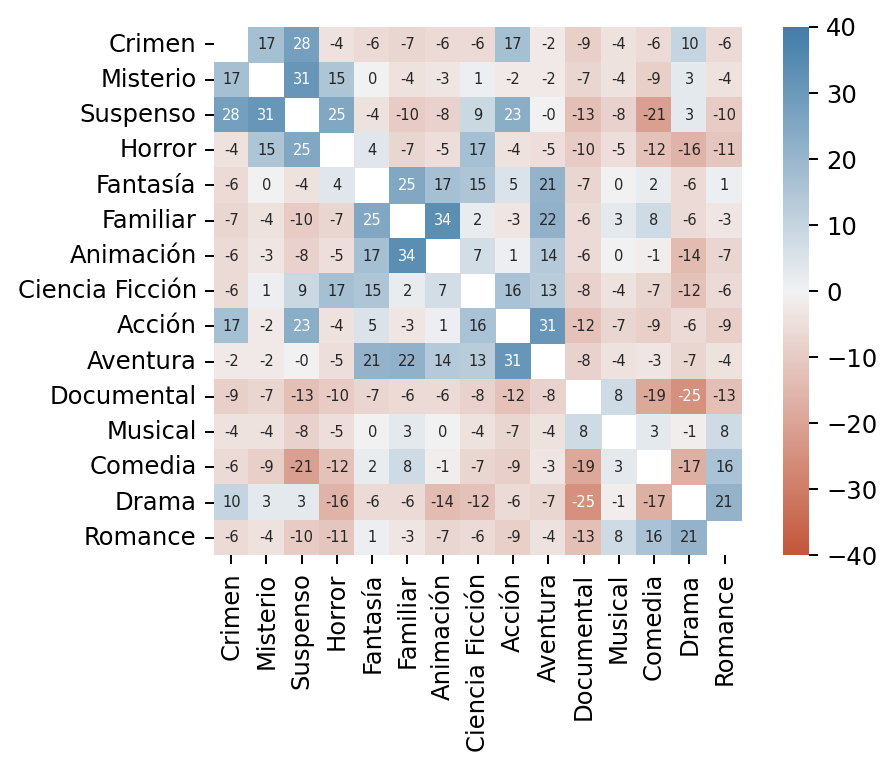

In [ ]:
import numpy as np
import math
E = np.eye(15)
plt.figure(dpi = 175)
sns.heatmap(matriz.round(),mask = E,cmap= sns.diverging_palette(20, 240, as_cmap=True),square=True,vmin=-40,vmax=40,annot = True,fmt="g",annot_kws={"fontsize":6}) 